In [1]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras import regularizers
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Classification Report
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import pickle
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# load dataset
path_to_load = r'C:\Users\Dima\Desktop\СберУниверситет\Дипломный проект\Диплом файлы\file_df_set_train_MLP_new.csv'
df1 = pd.read_csv(path_to_load)
# load test
#path_to_load = r'C:\Users\Dima\Desktop\СберУниверситет\Дипломный проект\file_df_test_set.csv'
#df1 = pd.read_csv(path_to_load)

In [3]:
df1

,Unnamed: 0,target,target_len,text
0,0,0,1,ижевск мастер контрольный участка цеха salary5...
1,1,8,1,москва инженер лаборатории salary4 team4 manag...
2,2,0,1,екатеринбург техник по документации плавучей а...
3,3,0,1,санкт петербург техник полиграфист salary5 tea...
4,4,8,1,москва инструктор переводчик по обслуживанию г...
...,...,...,...,...
50871,50871,"3,8",3,челябинск инженер по эксплуатации и наладке об...
50872,50872,8,1,санкт петербург инженер физик в ракетно космич...
50873,50873,8,1,нижний новгород лаборант исследователь в облас...
50874,50874,1,1,москва инженер проектировщик фотошаблонов для ...


In [12]:
df = df1[df1['target_len'] == 1].copy()
for target in df['target'].unique():
    print(target, len(df[df['target'] == target]))

0 21003
8 24093
7 326
6 368
3 905
1 1269
5 102
4 38
2 12


In [13]:
df.drop_duplicates(inplace=True)
df

,Unnamed: 0,target,target_len,text
0,0,0,1,ижевск мастер контрольный участка цеха salary5...
1,1,8,1,москва инженер лаборатории salary4 team4 manag...
2,2,0,1,екатеринбург техник по документации плавучей а...
3,3,0,1,санкт петербург техник полиграфист salary5 tea...
4,4,8,1,москва инструктор переводчик по обслуживанию г...
...,...,...,...,...
50870,50870,8,1,новосибирск выпускающий ответственный salary3 ...
50872,50872,8,1,санкт петербург инженер физик в ракетно космич...
50873,50873,8,1,нижний новгород лаборант исследователь в облас...
50874,50874,1,1,москва инженер проектировщик фотошаблонов для ...


In [16]:
# векторизация зависимой переменной
y = np.zeros((len(df), 9))
for i, target in enumerate(df['target']):
    for letter in target:
        if letter in '0123456789':
            y[i, int(letter)] = 1
y[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()

# сохраняем векторайзер
pkl_filename = r'C:\Users\Dima\Desktop\СберУниверситет\Дипломный проект\Диплом файлы\TfidfVectorizerMLP.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

In [24]:
y.shape

(48116, 9)

In [25]:
X.shape

(48116, 23848)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [27]:
# MLP
model = Sequential()
model.add(Dense(256, input_shape = (X.shape[1],), activation = "relu", kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.l2(0.0001))) #"relu"
#model.add(Dropout(0.5))
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu", kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation = "softmax", kernel_initializer='glorot_uniform'))
model.compile(Adadelta(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6105344   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 297       
Total params: 6,148,873
Trainable params: 6,148,873
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X, y, verbose=1, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
602/602 [==============================] - 59s 98ms/step - loss: 1.8167 - accuracy: 0.5002 - val_loss: 1.0937 - val_accuracy: 0.4998
Epoch 2/30
602/602 [==============================] - 49s 81ms/step - loss: 1.0637 - accuracy: 0.5189 - val_loss: 1.0677 - val_accuracy: 0.5031
Epoch 3/30
602/602 [==============================] - 49s 81ms/step - loss: 1.0409 - accuracy: 0.6251 - val_loss: 1.0439 - val_accuracy: 0.6551
Epoch 4/30
602/602 [==============================] - 49s 81ms/step - loss: 1.0136 - accuracy: 0.6761 - val_loss: 1.0154 - val_accuracy: 0.6705
Epoch 5/30
602/602 [==============================] - 49s 81ms/step - loss: 0.9819 - accuracy: 0.6799 - val_loss: 0.9864 - val_accuracy: 0.6748
Epoch 6/30
602/602 [==============================] - 48s 80ms/step - loss: 0.9544 - accuracy: 0.6816 - val_loss: 0.9662 - val_accuracy: 0.6759
Epoch 7/30
602/602 [==============================] - 48s 80ms/step - loss: 0.9358 - accuracy: 0.6838 - val_loss: 0.9542 - val_accuracy:

In [29]:
results = model.evaluate(X_test, y_test, batch_size=128)

38/38 [==============================] - 1s 29ms/step - loss: 0.8587 - accuracy: 0.7105


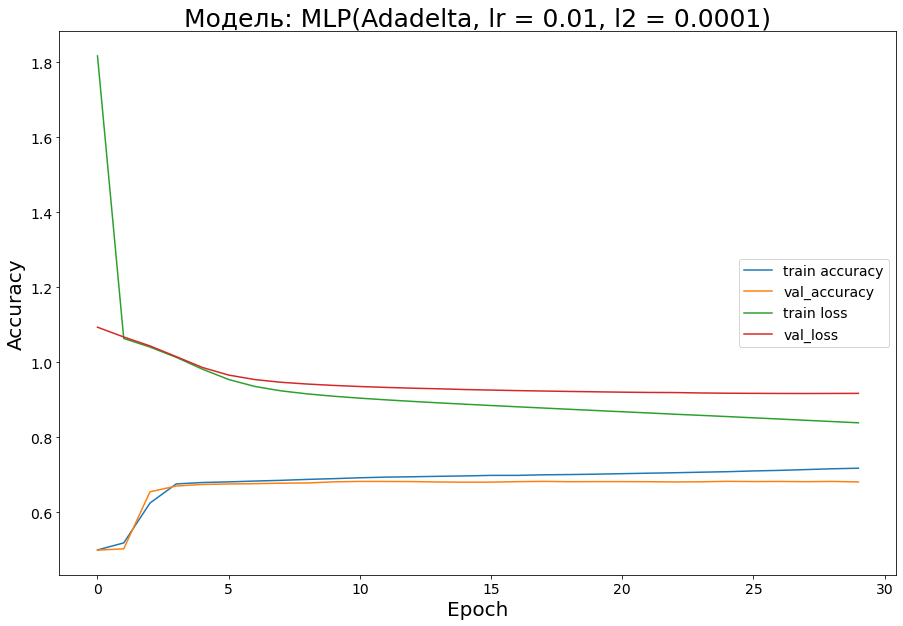

In [30]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'][:])
plt.plot(history.history['val_accuracy'][:])
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Модель: MLP(Adadelta, lr = 0.01, l2 = 0.0001)', fontsize=25)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['train accuracy', 'val_accuracy', 'train loss', 'val_loss'], loc='center right', fontsize=14)
plt.show()

In [31]:
model.save(r'C:\Users\Dima\Desktop\СберУниверситет\Дипломный проект\Диплом файлы\KerasModel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Dima\Desktop\СберУниверситет\Дипломный проект\Диплом файлы\KerasModel\assets
